In [2]:
#VARIABLES:
#App Name: Nombres de las aplicaciones
#Credibility: Credibilidad de las aplicaciones
#User Experience: Experiencia de usuario
#Transparency: Transparencia
#Proffesional review: Revisiones profesionales

In [3]:
#Credibility: Rango entre 0 y 5.0
#User Experience: Rango entre 0 y 5.0
#Transparency: Unacceptable: 1, Questionable: 3, Acceptable: 5
#Proffesional review: No: 0, Yes: 1

In [1]:
#Importar librerias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Importar y mostrar datos:
datos_apps = pd.read_csv("datos_app.csv", encoding ="latin1", sep = ";")
#Intenta cargar el archivo CSV 
datos_apps

,App Name,Credibility,User Experience,Transparency,Professional_Review
0,Personal Zen,4.67,4.10,Unacceptable,No
1,Good Days Ahead,4.55,4.15,Questionable,No
2,Flowy,4.55,4.10,Unacceptable,No
3,"MyLife Meditation (formerly Stop, Breathe & Th...",4.33,4.48,Unacceptable,No
4,FearFighter,4.30,3.98,Acceptable,Yes
...,...,...,...,...,...
88,Learn About Depression,0.36,1.02,Unacceptable,Yes
89,Marblesapp,0.33,1.23,Unacceptable,No
90,Obsessive Compulsive OCD Test,0.33,1.17,Questionable,Yes
91,OCD Anxiety Graph,0.33,1.10,Questionable,No


In [4]:
transparency_mapping = {'Unacceptable': 1, 'Questionable': 3, 'Acceptable': 5}

professional_review_mapping = {'No': 0, 'Yes': 1}

# Aplicar el mapeo a las columnas categóricas
datos_apps['Transparency_encoded'] = datos_apps['Transparency'].map(transparency_mapping)
datos_apps['Professional_Review_encoded'] = datos_apps['Professional_Review'].map(professional_review_mapping)

print("\nDataFrame después de la codificación ordinal:")
datos_apps


DataFrame después de la codificación ordinal:


,App Name,Credibility,User Experience,Transparency,Professional_Review,Transparency_encoded,Professional_Review_encoded
0,Personal Zen,4.67,4.10,Unacceptable,No,1,0
1,Good Days Ahead,4.55,4.15,Questionable,No,3,0
2,Flowy,4.55,4.10,Unacceptable,No,1,0
3,"MyLife Meditation (formerly Stop, Breathe & Th...",4.33,4.48,Unacceptable,No,1,0
4,FearFighter,4.30,3.98,Acceptable,Yes,5,1
...,...,...,...,...,...,...,...
88,Learn About Depression,0.36,1.02,Unacceptable,Yes,1,1
89,Marblesapp,0.33,1.23,Unacceptable,No,1,0
90,Obsessive Compulsive OCD Test,0.33,1.17,Questionable,Yes,3,1
91,OCD Anxiety Graph,0.33,1.10,Questionable,No,3,0


In [5]:
datos_apps.describe()

,User Experience,Transparency_encoded,Professional_Review_encoded
count,92.000000,93.000000,93.000000
mean,3.172174,2.505376,0.258065
std,0.873839,1.493636,0.439941
min,1.020000,1.000000,0.000000
25%,2.590000,1.000000,0.000000
50%,3.375000,3.000000,0.000000
75%,3.805000,3.000000,1.000000
max,4.670000,5.000000,1.000000


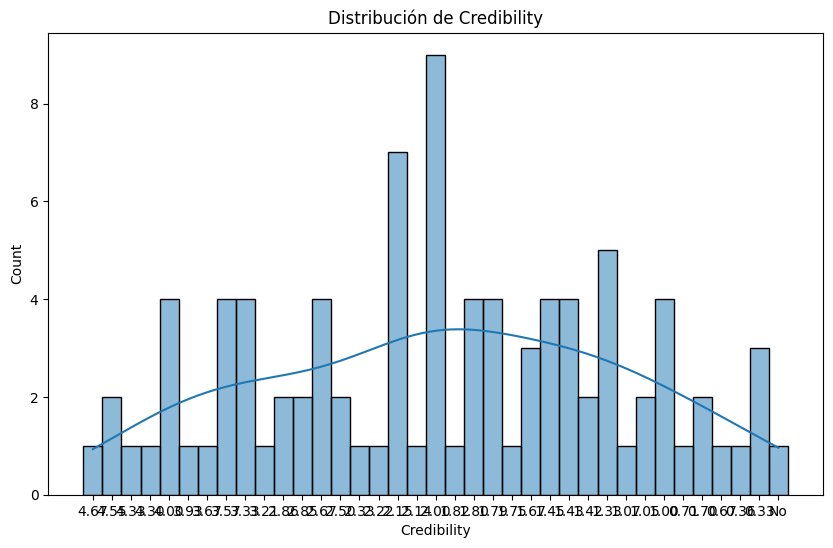

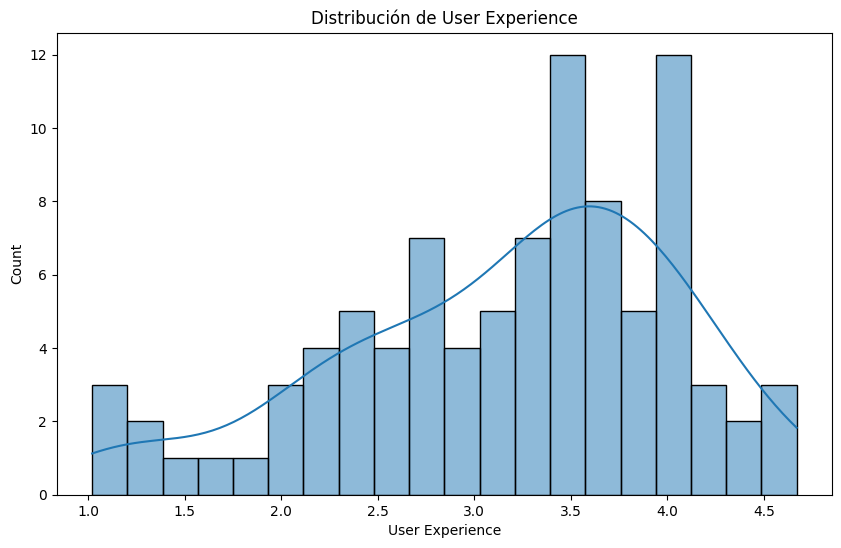

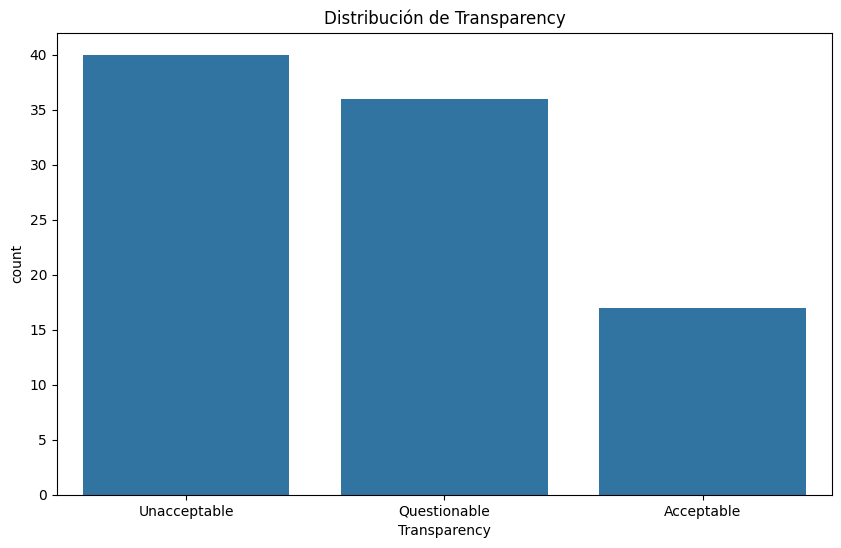

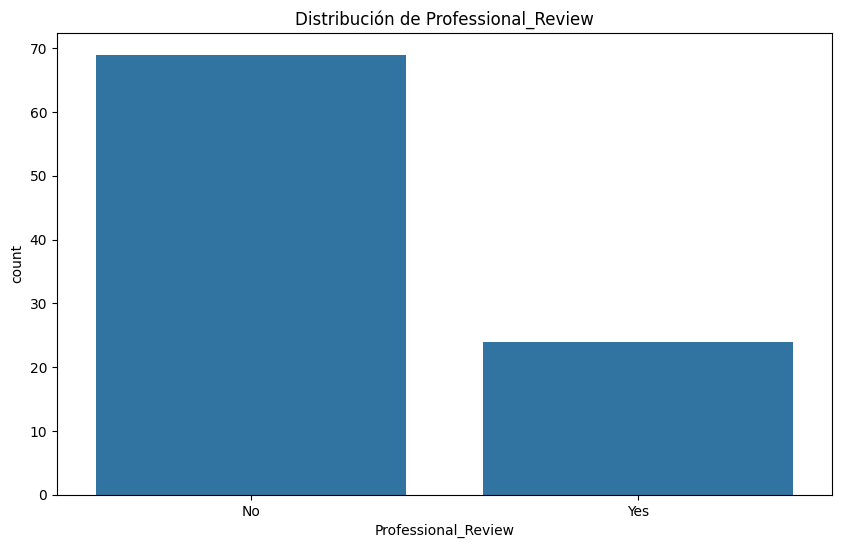

In [13]:
#Analisis de distribucion de datos:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de Credibility
plt.figure(figsize=(10, 6))
sns.histplot(datos_apps['Credibility'], bins=20, kde=True)
plt.title('Distribución de Credibility')
plt.show()

# Distribución de User Experience
plt.figure(figsize=(10, 6))
sns.histplot(datos_apps['User Experience'], bins=20, kde=True)
plt.title('Distribución de User Experience')
plt.show()

# Distribución de Transparency
plt.figure(figsize=(10, 6))
sns.countplot(x='Transparency', data=datos_apps)
plt.title('Distribución de Transparency')
plt.show()

# Distribución de Professional_Review
plt.figure(figsize=(10, 6))
sns.countplot(x='Professional_Review', data=datos_apps)
plt.title('Distribución de Professional_Review')
plt.show()

In [ ]:
"""
Credibility y User Experience:

Ambas variables numéricas pueden mostrar una variedad de distribuciones. Por ejemplo, 
si ambas distribuciones son aproximadamente normales (campana), su análisis puede seguir 
técnicas que asumen normalidad.
Si hay outliers o si las distribuciones están sesgadas, podrías 
necesitar transformaciones adicionales (como logaritmos) o técnicas de manejo de outliers.

Transparency y Professional_Review:

La distribución categórica de Transparency y Professional_Review puede indicar si 
existe un sesgo en el conjunto de datos. Por ejemplo, si hay muchas más aplicaciones 
categorizadas como Acceptable o muchas más revisiones profesionales con Yes, esto puede 
influir en el análisis posterior.
Es importante asegurar que las categorías estén adecuadamente representadas 
para evitar modelos sesgados.
"""

c:\Users\Santiago HG\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


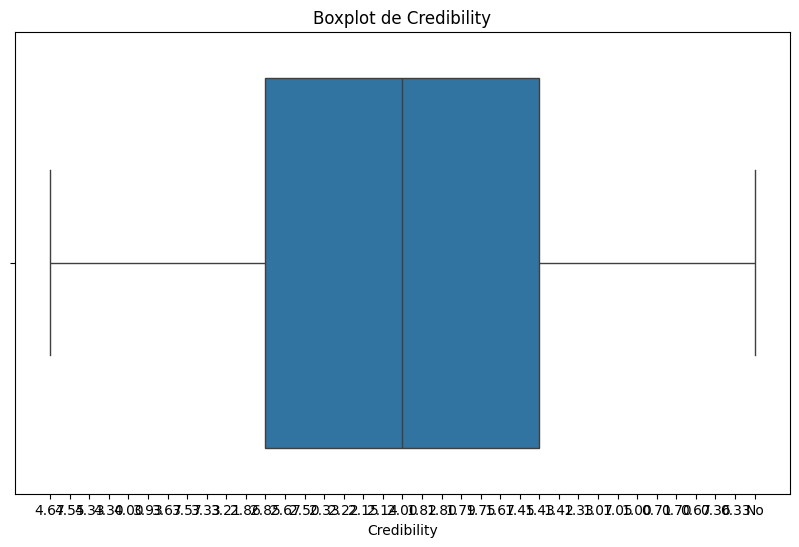

c:\Users\Santiago HG\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


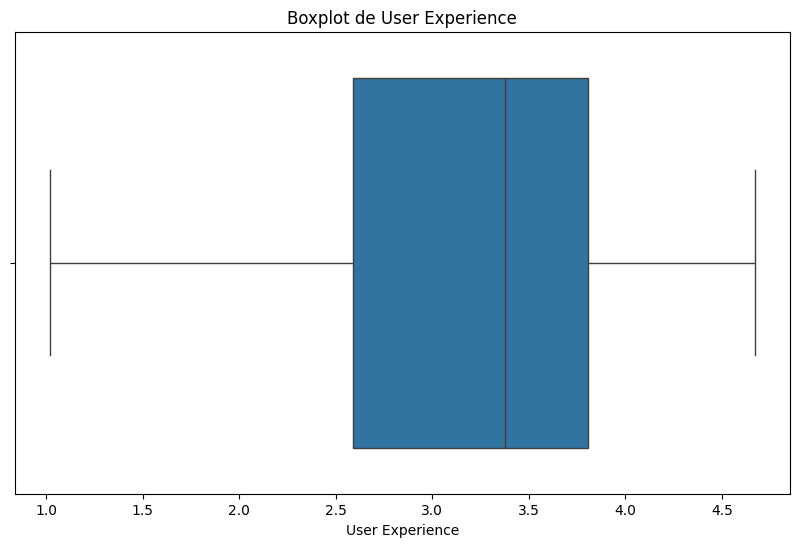

In [14]:
# Boxplot de Credibility
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credibility', data=datos_apps)
plt.title('Boxplot de Credibility')
plt.show()

# Boxplot de User Experience
plt.figure(figsize=(10, 6))
sns.boxplot(x='User Experience', data=datos_apps)
plt.title('Boxplot de User Experience')
plt.show()

In [8]:
df_numerico = datos_apps.select_dtypes(include = ['float64', 'int64'])
df_numerico

,User Experience,Transparency_encoded,Professional_Review_encoded
0,4.10,1,0
1,4.15,3,0
2,4.10,1,0
3,4.48,1,0
4,3.98,5,1
...,...,...,...
88,1.02,1,1
89,1.23,1,0
90,1.17,3,1
91,1.10,3,0


In [10]:
# Calcular las correlaciones entre las columnas numéricas
correlaciones = df_numerico.corr()
correlaciones

,User Experience,Transparency_encoded,Professional_Review_encoded
User Experience,1.000000,0.014076,-0.091850
Transparency_encoded,0.014076,1.000000,0.030948
Professional_Review_encoded,-0.091850,0.030948,1.000000


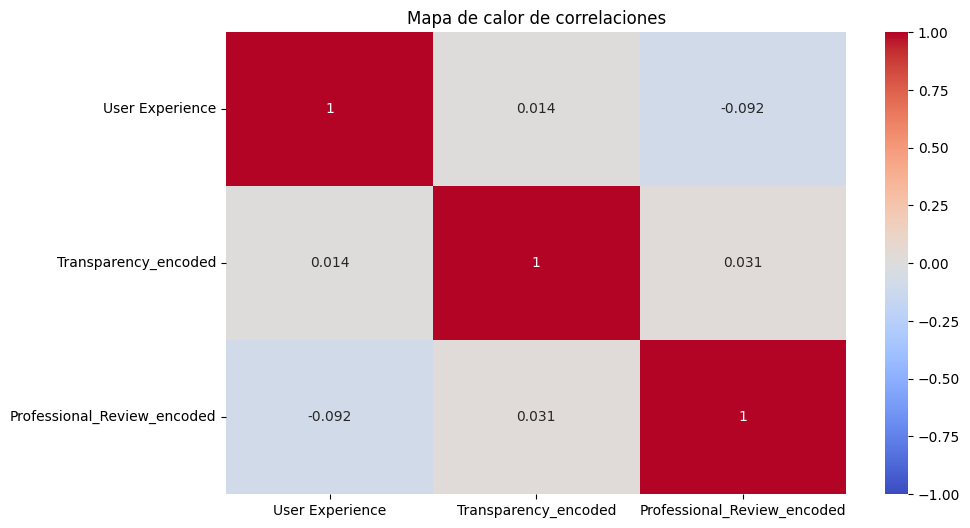

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlación visual
plt.figure(figsize=(10, 6))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de correlaciones')
plt.show()

In [ ]:
"""
Los valores de correlación pueden variar entre -1 y 1.
Un valor de correlación cercano a 1 indica una fuerte correlación positiva entre 
dos variables (cuando una aumenta, la otra también tiende a aumentar).

Un valor de correlación cercano a -1 indica una fuerte correlación negativa entre dos variables (
cuando una aumenta, la otra tiende a disminuir).

Un valor de correlación cercano a 0 indica que no hay una relación lineal significativa entre las variables.

"""

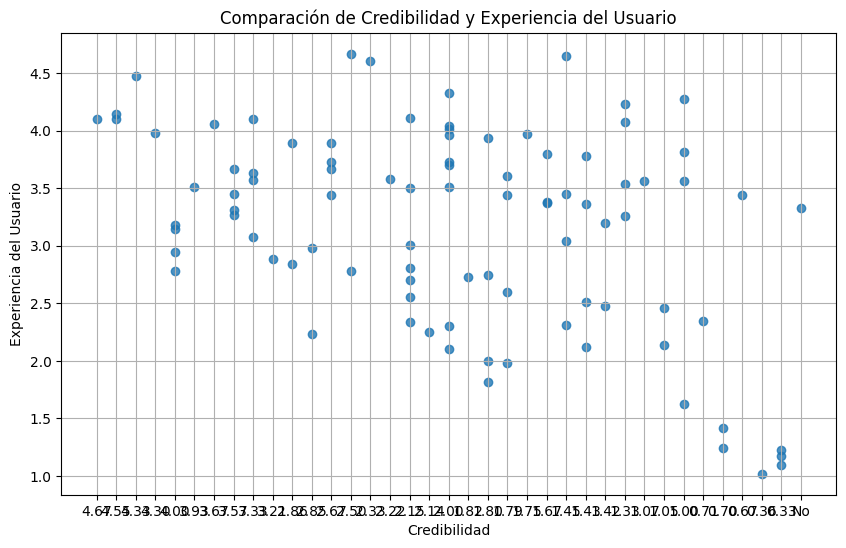

In [6]:
"""
#Comparación de la credibilidad y la experiencia del usuario:

Análisis: Podrías investigar si existe alguna relación entre la credibilidad de una aplicación 
y la experiencia del usuario. Por ejemplo, podrías analizar si las aplicaciones con una alta 
credibilidad tienden a tener una mejor experiencia de usuario.
"""

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos_apps["Credibility"], datos_apps["User Experience"], alpha=0.8)

# Añadir etiquetas y título
plt.xlabel("Credibilidad")
plt.ylabel("Experiencia del Usuario")
plt.title("Comparación de Credibilidad y Experiencia del Usuario")

"""
Gráfica: Podrías crear un gráfico de dispersión donde el eje x represente la credibilidad 
y el eje y represente la experiencia del usuario. Cada punto en el gráfico representaría una 
aplicación, y podrías usar diferentes colores o formas para distinguir entre las diferentes 
categorías de transparencia y revisión profesional.
"""

# Mostrar el gráfico
plt.grid(True)
plt.show()


In [7]:
"""
En este análisis, queremos investigar si hay alguna relación entre la credibilidad de una aplicación 
de salud mental y la experiencia del usuario que ofrece. La credibilidad de una aplicación es crucial, 
ya que los usuarios confían en ella para obtener información precisa y útil sobre su salud mental. 
Por otro lado, la experiencia del usuario es un factor determinante en la satisfacción y la 
efectividad de una aplicación.

Para realizar este análisis, vamos a utilizar un enfoque visual mediante la creación de un 
gráfico de dispersión. En este gráfico, el eje x representará la credibilidad de la aplicación, 
mientras que el eje y representará la experiencia del usuario. Cada punto en el gráfico representará #una aplicación individual.

Al observar el gráfico de dispersión, podremos identificar patrones o tendencias que sugieran 
si las aplicaciones con una alta credibilidad tienden a proporcionar una mejor experiencia de 
usuario. Además, podemos usar diferentes colores o formas para distinguir entre las diferentes 
categorías de transparencia y revisión profesional, lo que nos permitirá una análisis más 
detallado y completo de la relación entre la credibilidad y la experiencia del usuario en 
las aplicaciones de salud mental.
"""

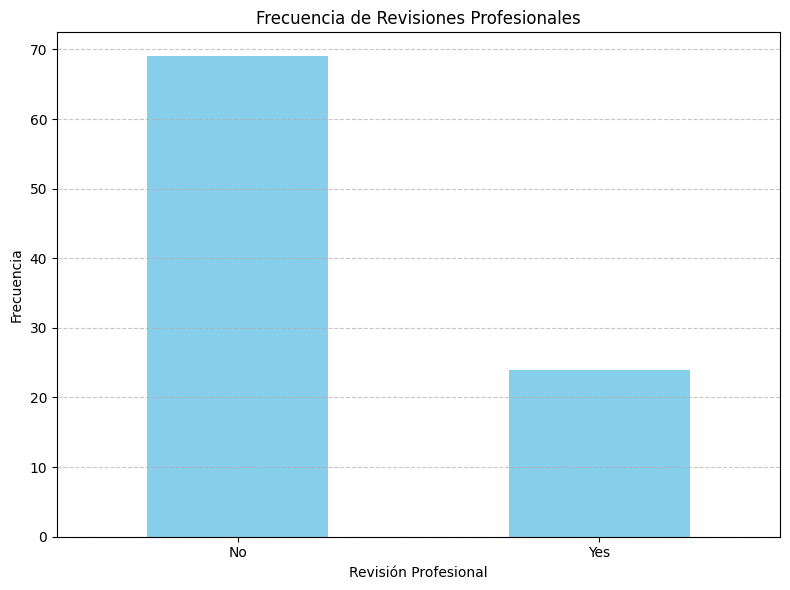

In [8]:
frecuencia_revision = datos_apps["Professional_Review"].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
frecuencia_revision.plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.xlabel("Revisión Profesional")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Revisiones Profesionales")

# Mostrar el gráfico
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

"""
Al observar el gráfico resultante, podemos determinar con qué frecuencia se realizan 
las revisiones profesionales en las aplicaciones y si hay alguna diferencia notable 
en la cantidad de aplicaciones revisadas profesionalmente en comparación con las que 
no lo están. Esto nos ayudará a comprender mejor el impacto de las revisiones profesionales 
en la credibilidad de las aplicaciones de salud mental.

La disparidad notable entre las aplicaciones de salud mental revisadas profesionalmente 
y aquellas que carecen de esta evaluación destaca una brecha considerable en la calidad y 
seguridad de estas herramientas digitales, planteando interrogantes sobre las prácticas de 
desarrollo y los estándares de la industria. Es imperativo aumentar la conciencia sobre la 
importancia de la revisión profesional para garantizar la credibilidad y confianza del 
usuario, especialmente dado el impacto directo de estas aplicaciones en el bienestar 
emocional. Además, se destaca la necesidad de políticas y regulaciones más estrictas 
que promuevan la revisión profesional como estándar, lo que no solo beneficiaría a los 
usuarios al garantizar el acceso a herramientas confiables, sino que también fortalecería 
la reputación y la legitimidad de la industria en su conjunto.
"""
